In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.probability import FreqDist
nltk.download(["stopwords", "punkt", "wordnet", "omw-1.4","vader_lexicon"])
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [212]:
########################### read the dataset #########################################

data =pd.read_csv("tourist_accommodation.txt", sep = "\t", encoding = "windows-1252")

In [213]:
########################## data previous  #############################################

data.head()

,id,reviewed_date,location,hotel_restaurant_name,review
0,rn581181959,Reviewed yesterday,Patong,3 Spices Restaurant,The food was average my other half ask for som...
1,rn580277719,Reviewed 6 days ago,Patong,3 Spices Restaurant,"nice meal, cocktails were not great but standa..."
2,rn574824190,Reviewed 4 weeks ago,Patong,3 Spices Restaurant,We tried a lot of different Thai resturants du...
3,rn570500865,"Reviewed April 2, 2018",Patong,3 Spices Restaurant,"The food is really nice, but the staff seem a ..."
4,rn569846380,"Reviewed March 31, 2018",Patong,3 Spices Restaurant,Probably one of the yummiest Thai I have ever ...


In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2949 entries, 0 to 2948
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2949 non-null   object
 1   reviewed_date          2949 non-null   object
 2   location               2949 non-null   object
 3   hotel_restaurant_name  2949 non-null   object
 4   review                 2949 non-null   object
dtypes: object(5)
memory usage: 115.3+ KB


In [215]:
data.describe()

,id,reviewed_date,location,hotel_restaurant_name,review
count,2949,2949,2949,2949,2949
unique,2488,1108,1,29,2488
top,rn292481886,Reviewed 1 week ago,Patong,Da Mario,"Being low season, most of the restaurants are ..."
freq,10,31,2949,187,10


In [216]:
data.shape

(2949, 5)

In [217]:
print("\n All Data Labels")
print(data.groupby("location").count())


 All Data Labels
            id  reviewed_date  hotel_restaurant_name  review
location                                                    
 Patong   2949           2949                   2949    2949


In [218]:
######### converting the review column to string type ########################

data["review"] = data["review"].astype(str).str.lower()
print(type(data["review"]))

<class 'pandas.core.series.Series'>


In [221]:
######### defining regular expressions ######################################

regexp = RegexpTokenizer("[a-zA-Z0-9\']+")

In [252]:
######### apply regexp to review column  ####################################

data["tokenized_review"] = data["review"].apply(regexp.tokenize)
data.head()

,id,reviewed_date,location,hotel_restaurant_name,review,tokenized_review,tokenized_string,tokenized_string_lemma,token_polarity_review,compound,neg,neu,pos
0,rn581181959,Reviewed yesterday,Patong,3 Spices Restaurant,the food was average my other half ask for som...,"[the, food, was, average, my, other, half, ask...",food average half ask something mild brought s...,food average half ask something mild brought s...,"{'neg': 0.0, 'neu': 0.797, 'pos': 0.203, 'comp...",0.4215,0.000,0.797,0.203
1,rn580277719,Reviewed 6 days ago,Patong,3 Spices Restaurant,"nice meal, cocktails were not great but standa...","[nice, meal, cocktails, were, not, great, but,...",nice meal cocktails great standard food excell...,nice meal cocktails great standard food excell...,"{'neg': 0.0, 'neu': 0.242, 'pos': 0.758, 'comp...",0.9571,0.000,0.242,0.758
2,rn574824190,Reviewed 4 weeks ago,Patong,3 Spices Restaurant,we tried a lot of different thai resturants du...,"[we, tried, a, lot, of, different, thai, restu...",tried lot different thai resturants stay hands...,tried lot different thai resturants stay hands...,"{'neg': 0.0, 'neu': 0.558, 'pos': 0.442, 'comp...",0.8834,0.000,0.558,0.442
3,rn570500865,"Reviewed April 2, 2018",Patong,3 Spices Restaurant,"the food is really nice, but the staff seem a ...","[the, food, is, really, nice, but, the, staff,...",food really nice staff seem bit stressed seems...,food really nice staff seem bit stressed seems...,"{'neg': 0.108, 'neu': 0.404, 'pos': 0.489, 'co...",0.8173,0.108,0.404,0.489
4,rn569846380,"Reviewed March 31, 2018",Patong,3 Spices Restaurant,probably one of the yummiest thai i have ever ...,"[probably, one, of, the, yummiest, thai, i, ha...",probably one yummiest thai ever food tasty pri...,probably one yummiest thai ever food tasty pri...,"{'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'comp...",0.5719,0.000,0.748,0.252


In [249]:
######### to define and print stop words  ###############################

from nltk.corpus import stopwords
stop_words = nltk.corpus.stopwords.words("english")
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [250]:
########### to apply stop words to review column #############################

data["tokenized_review"] = data["tokenized_review"].apply(lambda x: [item for item in x if item not in stop_words])
data.head()

,id,reviewed_date,location,hotel_restaurant_name,review,tokenized_review,tokenized_string,tokenized_string_lemma,token_polarity_review,compound,neg,neu,pos
0,rn581181959,Reviewed yesterday,Patong,3 Spices Restaurant,the food was average my other half ask for som...,"[food, average, half, ask, something, mild, br...",food average half ask something mild brought s...,food average half ask something mild brought s...,"{'neg': 0.0, 'neu': 0.797, 'pos': 0.203, 'comp...",0.4215,0.000,0.797,0.203
1,rn580277719,Reviewed 6 days ago,Patong,3 Spices Restaurant,"nice meal, cocktails were not great but standa...","[nice, meal, cocktails, great, standard, food,...",nice meal cocktails great standard food excell...,nice meal cocktails great standard food excell...,"{'neg': 0.0, 'neu': 0.242, 'pos': 0.758, 'comp...",0.9571,0.000,0.242,0.758
2,rn574824190,Reviewed 4 weeks ago,Patong,3 Spices Restaurant,we tried a lot of different thai resturants du...,"[tried, lot, different, thai, resturants, stay...",tried lot different thai resturants stay hands...,tried lot different thai resturants stay hands...,"{'neg': 0.0, 'neu': 0.558, 'pos': 0.442, 'comp...",0.8834,0.000,0.558,0.442
3,rn570500865,"Reviewed April 2, 2018",Patong,3 Spices Restaurant,"the food is really nice, but the staff seem a ...","[food, really, nice, staff, seem, bit, stresse...",food really nice staff seem bit stressed seems...,food really nice staff seem bit stressed seems...,"{'neg': 0.108, 'neu': 0.404, 'pos': 0.489, 'co...",0.8173,0.108,0.404,0.489
4,rn569846380,"Reviewed March 31, 2018",Patong,3 Spices Restaurant,probably one of the yummiest thai i have ever ...,"[probably, one, yummiest, thai, ever, food, ta...",probably one yummiest thai ever food tasty pri...,probably one yummiest thai ever food tasty pri...,"{'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'comp...",0.5719,0.000,0.748,0.252


In [253]:
########### to define the infrequent words and apply to review ################################

data["tokenized_string"] = data["tokenized_review"].apply(lambda x: " ".join([item for item in x if len(item)>2]))
data.head()

,id,reviewed_date,location,hotel_restaurant_name,review,tokenized_review,tokenized_string,tokenized_string_lemma,token_polarity_review,compound,neg,neu,pos
0,rn581181959,Reviewed yesterday,Patong,3 Spices Restaurant,the food was average my other half ask for som...,"[the, food, was, average, my, other, half, ask...",the food was average other half ask for someth...,food average half ask something mild brought s...,"{'neg': 0.0, 'neu': 0.797, 'pos': 0.203, 'comp...",0.4215,0.000,0.797,0.203
1,rn580277719,Reviewed 6 days ago,Patong,3 Spices Restaurant,"nice meal, cocktails were not great but standa...","[nice, meal, cocktails, were, not, great, but,...",nice meal cocktails were not great but standar...,nice meal cocktails great standard food excell...,"{'neg': 0.0, 'neu': 0.242, 'pos': 0.758, 'comp...",0.9571,0.000,0.242,0.758
2,rn574824190,Reviewed 4 weeks ago,Patong,3 Spices Restaurant,we tried a lot of different thai resturants du...,"[we, tried, a, lot, of, different, thai, restu...",tried lot different thai resturants during our...,tried lot different thai resturants stay hands...,"{'neg': 0.0, 'neu': 0.558, 'pos': 0.442, 'comp...",0.8834,0.000,0.558,0.442
3,rn570500865,"Reviewed April 2, 2018",Patong,3 Spices Restaurant,"the food is really nice, but the staff seem a ...","[the, food, is, really, nice, but, the, staff,...",the food really nice but the staff seem bit st...,food really nice staff seem bit stressed seems...,"{'neg': 0.108, 'neu': 0.404, 'pos': 0.489, 'co...",0.8173,0.108,0.404,0.489
4,rn569846380,"Reviewed March 31, 2018",Patong,3 Spices Restaurant,probably one of the yummiest thai i have ever ...,"[probably, one, of, the, yummiest, thai, i, ha...",probably one the yummiest thai have ever had f...,probably one yummiest thai ever food tasty pri...,"{'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'comp...",0.5719,0.000,0.748,0.252


In [254]:
############## use WordNetLemmatizer to lemmatise reviews ###########################

from nltk.stem import WordNetLemmatizer 
stemmer = WordNetLemmatizer()
data["tokenized_string_lemma"] = data["tokenized_string"].apply(stemmer.lemmatize)
data.head()

,id,reviewed_date,location,hotel_restaurant_name,review,tokenized_review,tokenized_string,tokenized_string_lemma,token_polarity_review,compound,neg,neu,pos
0,rn581181959,Reviewed yesterday,Patong,3 Spices Restaurant,the food was average my other half ask for som...,"[the, food, was, average, my, other, half, ask...",the food was average other half ask for someth...,the food was average other half ask for someth...,"{'neg': 0.0, 'neu': 0.797, 'pos': 0.203, 'comp...",0.4215,0.000,0.797,0.203
1,rn580277719,Reviewed 6 days ago,Patong,3 Spices Restaurant,"nice meal, cocktails were not great but standa...","[nice, meal, cocktails, were, not, great, but,...",nice meal cocktails were not great but standar...,nice meal cocktails were not great but standar...,"{'neg': 0.0, 'neu': 0.242, 'pos': 0.758, 'comp...",0.9571,0.000,0.242,0.758
2,rn574824190,Reviewed 4 weeks ago,Patong,3 Spices Restaurant,we tried a lot of different thai resturants du...,"[we, tried, a, lot, of, different, thai, restu...",tried lot different thai resturants during our...,tried lot different thai resturants during our...,"{'neg': 0.0, 'neu': 0.558, 'pos': 0.442, 'comp...",0.8834,0.000,0.558,0.442
3,rn570500865,"Reviewed April 2, 2018",Patong,3 Spices Restaurant,"the food is really nice, but the staff seem a ...","[the, food, is, really, nice, but, the, staff,...",the food really nice but the staff seem bit st...,the food really nice but the staff seem bit st...,"{'neg': 0.108, 'neu': 0.404, 'pos': 0.489, 'co...",0.8173,0.108,0.404,0.489
4,rn569846380,"Reviewed March 31, 2018",Patong,3 Spices Restaurant,probably one of the yummiest thai i have ever ...,"[probably, one, of, the, yummiest, thai, i, ha...",probably one the yummiest thai have ever had f...,probably one the yummiest thai have ever had f...,"{'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'comp...",0.5719,0.000,0.748,0.252


In [255]:
############## defining word lemma to identify most frequently used words ###############

words = nltk.word_tokenize(word_lemma)
frequency_distribution = FreqDist(words)
fd = frequency_distribution.most_common(20)

<AxesSubplot:ylabel='Count'>

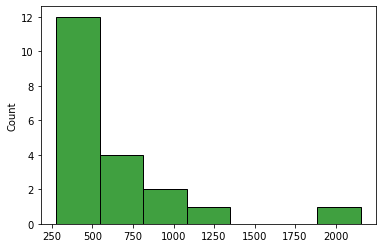

In [256]:
########### visualise the dount of the most frequently used words  ################

top_20_words = pd.Series(dict(fd))
sns.histplot(x = top_20_words, color ="green")

In [258]:
########### defining VADER for sentiment analysis  ##############################

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentimentt = SentimentIntensityAnalyzer()
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

In [257]:
######### applying sentiment analyser   ########################################

data['token_polarity_review'] = data['tokenized_string_lemma'].apply(lambda x: sentimentt.polarity_scores(x))
data['token_polarity_review'].describe()

count                                                  2949
unique                                                 2370
top       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
freq                                                     43
Name: token_polarity_review, dtype: object

In [264]:
############### to print sentiment analysis polarity and score ########################

print(data['token_polarity_review'])
print(type(data['token_polarity_review']))
print(sentiment.polarity_scores("data"))


0       {'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'comp...
1       {'neg': 0.069, 'neu': 0.356, 'pos': 0.574, 'co...
2       {'neg': 0.0, 'neu': 0.708, 'pos': 0.292, 'comp...
3       {'neg': 0.09, 'neu': 0.553, 'pos': 0.357, 'com...
4       {'neg': 0.0, 'neu': 0.84, 'pos': 0.16, 'compou...
                              ...                        
2944    {'neg': 0.085, 'neu': 0.812, 'pos': 0.103, 'co...
2945    {'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'comp...
2946    {'neg': 0.062, 'neu': 0.811, 'pos': 0.127, 'co...
2947    {'neg': 0.357, 'neu': 0.566, 'pos': 0.077, 'co...
2948    {'neg': 0.0, 'neu': 0.822, 'pos': 0.178, 'comp...
Name: token_polarity_review, Length: 2949, dtype: object
<class 'pandas.core.series.Series'>
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [265]:
######## creating columns from the polarity dictionary    ################

data["compound"] = [sentiment.polarity_scores(review)["compound"] for review in data["tokenized_string_lemma"]]
data["neg"] = [sentiment.polarity_scores(review)["neg"] for review in data["tokenized_string_lemma"]]
data["neu"] = [sentiment.polarity_scores(review)["neu"] for review in data["tokenized_string_lemma"]]
data["pos"] = [sentiment.polarity_scores(review)["pos"] for review in data["tokenized_string_lemma"]]
data.head()

,id,reviewed_date,location,hotel_restaurant_name,review,tokenized_review,tokenized_string,tokenized_string_lemma,token_polarity_review,compound,neg,neu,pos
0,rn581181959,Reviewed yesterday,Patong,3 Spices Restaurant,the food was average my other half ask for som...,"[the, food, was, average, my, other, half, ask...",the food was average other half ask for someth...,the food was average other half ask for someth...,"{'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'comp...",0.5719,0.000,0.856,0.144
1,rn580277719,Reviewed 6 days ago,Patong,3 Spices Restaurant,"nice meal, cocktails were not great but standa...","[nice, meal, cocktails, were, not, great, but,...",nice meal cocktails were not great but standar...,nice meal cocktails were not great but standar...,"{'neg': 0.069, 'neu': 0.356, 'pos': 0.574, 'co...",0.9486,0.069,0.356,0.574
2,rn574824190,Reviewed 4 weeks ago,Patong,3 Spices Restaurant,we tried a lot of different thai resturants du...,"[we, tried, a, lot, of, different, thai, restu...",tried lot different thai resturants during our...,tried lot different thai resturants during our...,"{'neg': 0.0, 'neu': 0.708, 'pos': 0.292, 'comp...",0.8834,0.000,0.708,0.292
3,rn570500865,"Reviewed April 2, 2018",Patong,3 Spices Restaurant,"the food is really nice, but the staff seem a ...","[the, food, is, really, nice, but, the, staff,...",the food really nice but the staff seem bit st...,the food really nice but the staff seem bit st...,"{'neg': 0.09, 'neu': 0.553, 'pos': 0.357, 'com...",0.8460,0.090,0.553,0.357
4,rn569846380,"Reviewed March 31, 2018",Patong,3 Spices Restaurant,probably one of the yummiest thai i have ever ...,"[probably, one, of, the, yummiest, thai, i, ha...",probably one the yummiest thai have ever had f...,probably one the yummiest thai have ever had f...,"{'neg': 0.0, 'neu': 0.84, 'pos': 0.16, 'compou...",0.6115,0.000,0.840,0.160


,id,reviewed_date,location,hotel_restaurant_name,review,tokenized_review,tokenized_string,tokenized_string_lemma,token_polarity_review,compound,neg,neu,pos
0,rn581181959,Reviewed yesterday,Patong,3 Spices Restaurant,the food was average my other half ask for som...,"[the, food, was, average, my, other, half, ask...",the food was average other half ask for someth...,the food was average other half ask for someth...,"{'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'comp...",0.5719,0.000,0.856,0.144
1,rn580277719,Reviewed 6 days ago,Patong,3 Spices Restaurant,"nice meal, cocktails were not great but standa...","[nice, meal, cocktails, were, not, great, but,...",nice meal cocktails were not great but standar...,nice meal cocktails were not great but standar...,"{'neg': 0.069, 'neu': 0.356, 'pos': 0.574, 'co...",0.9486,0.069,0.356,0.574
2,rn574824190,Reviewed 4 weeks ago,Patong,3 Spices Restaurant,we tried a lot of different thai resturants du...,"[we, tried, a, lot, of, different, thai, restu...",tried lot different thai resturants during our...,tried lot different thai resturants during our...,"{'neg': 0.0, 'neu': 0.708, 'pos': 0.292, 'comp...",0.8834,0.000,0.708,0.292
3,rn570500865,"Reviewed April 2, 2018",Patong,3 Spices Restaurant,"the food is really nice, but the staff seem a ...","[the, food, is, really, nice, but, the, staff,...",the food really nice but the staff seem bit st...,the food really nice but the staff seem bit st...,"{'neg': 0.09, 'neu': 0.553, 'pos': 0.357, 'com...",0.8460,0.090,0.553,0.357
4,rn569846380,"Reviewed March 31, 2018",Patong,3 Spices Restaurant,probably one of the yummiest thai i have ever ...,"[probably, one, of, the, yummiest, thai, i, ha...",probably one the yummiest thai have ever had f...,probably one the yummiest thai have ever had f...,"{'neg': 0.0, 'neu': 0.84, 'pos': 0.16, 'compou...",0.6115,0.000,0.840,0.160


<AxesSubplot:xlabel='compound', ylabel='Count'>

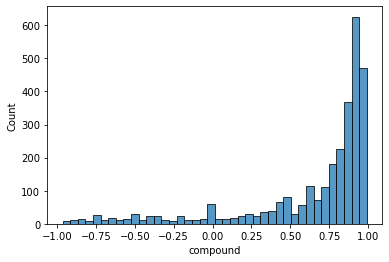

In [266]:
############## visualising the count of compound polarity #####################

sns.histplot(data["compound"])

<AxesSubplot:xlabel='neg', ylabel='Count'>

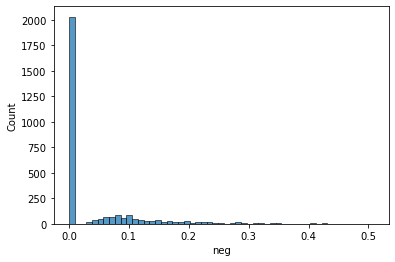

In [243]:
############## visualising the count of negative polarity #####################

sns.histplot(data["neg"])

<AxesSubplot:xlabel='neu', ylabel='Count'>

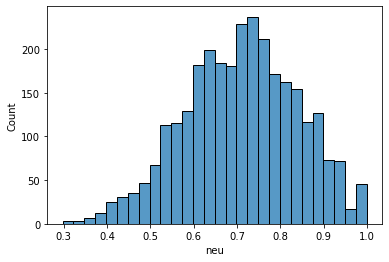

In [267]:
############## visualising the count of neutral polarity #####################

sns.histplot(data["neu"])

<AxesSubplot:xlabel='pos', ylabel='Count'>

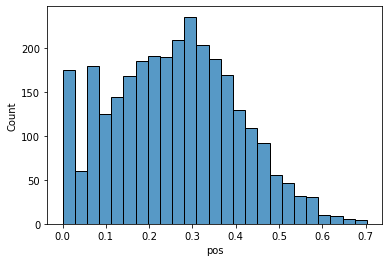

In [268]:
############## visualising the count of positive polarity #####################

sns.histplot(data["pos"])

In [246]:
(data["compound"] <=0).groupby(data["hotel_restaurant_name"]).sum()

hotel_restaurant_name
3 Spices Restaurant                             6
99 Seafood                                     19
Acqua Restaurant                                4
Ali Baba Restaurant                            33
Ao Chalong Yacht Club Restaurant                3
Arabia Restaurant                               5
Austrian Garden Restaurant                      3
BYD Lofts Restaurant Bistro & Bar               6
Baan Rim Pa Patong                              7
Badsha Indian Food                             17
Bai Toey                                        7
Baia Del Sole                                   0
Baluchi Restaurant                              9
Baoli                                          18
Belgian Beer Cafe Graceland                     8
Bite in                                        22
Blue Horizon - Top Quality Thai Food            7
Bondi Aussie Bar & Grill Phuket                16
Briley Chicken Rice                            10
Bubbles Restaurant          

(-0.5, 599.5, 399.5, -0.5)

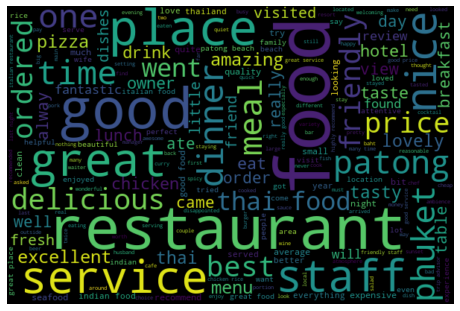

In [269]:
############ creating word cloud of the most relevant words #################

word_lemma = " ".join([word for word in data["tokenized_string_lemma"]])
wordcloud = WordCloud(width = 600, height = 400, random_state = 2, 
                      max_font_size = 100).generate(word_lemma)
plt.figure(figsize = (8,8))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis(False)